In [136]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame as DF
from sympy import diff
from sympy.abc import x,y
from sympy import cos
from sympy import *
from sympy import lambdify
from itertools import product
import random
from scipy.linalg import norm

**Define path.**

In [137]:
# Defining path to folder raw data is saved in
path = "C:/Users/robtk/OneDrive/Desktop/DIAS Internship/Raw data/Harmonic oscillator warm up/"

### Set display of pandas dataframes and Series to 11 decimal places

In [138]:
pd.set_option("display.precision", 11)

**Read in the outputs for 2 2x2 matrices**

In [148]:
X2_by_2 = pd.read_pickle(path+"X.pkl")
V2_by_2 = pd.read_pickle(path+"V.pkl")

X2 = pd.read_pickle(path+"Xb.pkl")
V2 = pd.read_pickle(path+"Vb.pkl")

X_test = pd.read_pickle(path+"X_test10.pkl")
V_test = pd.read_pickle(path+"V_test10.pkl")

X_test = pd.read_pickle(path+"X_test10.pkl")
V_test = pd.read_pickle(path+"V_test10.pkl")


In [146]:
A_list3 = pd.read_csv(path + "A_vector_initial.txt", sep = ";",
                        names = ["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9"],
                      index_col=False)

In [147]:
X_list3 = pd.read_csv(path + "X_vector_initial.txt", sep = "\s+;,",
                      names = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9"],
                      index_col=False)
X_list3["X1"][0]

<ipython-input-147-9f5b6aa4e332>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  X_list3 = pd.read_csv(path + "X_vector_initial.txt", sep = "\s+;,",


'0.004140886653359  0.002255679494230  0.025393301532669'

In [255]:
# Load in each line in the text file
X_list3 = pd.read_csv(path + "X1_simulation_2.txt",
                        names = ["X1"],
                      index_col=False)

# Split each line into a list in a list
data = []
for line in X_list3["X1"]:
    items = line.rstrip('\n').split(" ")
    data.append(items)
i = 0
while i < len(data):
    
    data[i] = list(filter(None, data[i]))
    i += 1

# Turn each element into a float
data_array = np.array(data, dtype=np.float32)    
    
# Turn every 2 lists into a single matrix by enclosing them in another list inside the array.
X_values = data_array.reshape(-1, 2, data_array.shape[1])

# X_values is a list of all X matrices recorded, it has the initial recordings of X1-X9 and then the 2nd recordings of X1-X9 etc.
# We need to break up every ninth element of X_values into new arrays as follows

X_matrices = [None] * 9  # List to store the nine new arrays

for i in range(9):
    X_matrices[i] = X_values[i::9] # i::9 starts at the ith element and goes up in steps of 9 until the we get out of index of the array.

# X_matrices is now a list of 9 arrays, each holding the time evolutions of X1-X9 respectively.

# Put each array into a column of a dataframe
labels = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9"]

delta_t = 1*10**-3
record_steps = 1000
simulation_repetitions = 1000000

times = np.arange(0, simulation_repetitions*delta_t + delta_t*record_steps, delta_t*record_steps)

X1_DF = pd.DataFrame({"X1" : X_matrices[0].tolist(), "X2" : X_matrices[1].tolist(), "X3" : X_matrices[2].tolist(), "X4" : X_matrices[3].tolist(), "X5" : X_matrices[4].tolist(),
                     "X6" : X_matrices[5].tolist(), "X7" : X_matrices[6].tolist(), "X8" : X_matrices[7].tolist(), "X9" : X_matrices[8].tolist()}, index = times,
                    columns = labels)


In [257]:
# Load in each line in the text file
V_list3 = pd.read_csv(path + "V2_simulation_2.txt",
                        names = ["V1"],
                      index_col=False)

# Split each line into a list in a list
data = []
for line in V_list3["V1"]:
    items = line.rstrip('\n').split(" ")
    data.append(items)
i = 0
while i < len(data):
    
    data[i] = list(filter(None, data[i]))
    i += 1

# Turn each element into a float
data_array = np.array(data, dtype=np.float32)    
    
# Turn every 2 lists into a single matrix by enclosing them in another list inside the array.
V_values = data_array.reshape(-1, 2, data_array.shape[1])

# V_values is a list of all V matrices recorded, it has the initial matrices of V1-V9 and then the 2nd recordings of V1-V9 etc.
# We need to break up every ninth element of V_values into new arrays as follows

V_matrices = [None] * 9  # List to store the nine new arrays

for i in range(9):
    V_matrices[i] = V_values[i::9] # i::9 starts at the ith element and goes up in steps of 9 until the we get out of index of the array.

# X_matrices is now a list of 9 arrays, each holding the time evolutions of X1-X9 respectively.
#print(V_matrices)
# Put each array into a column of a dataframe
labels = ["V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9"]

delta_t = 1*10**-3
record_steps = 1000
simulation_repetitions = 1000000

times = np.arange(0, simulation_repetitions*delta_t + delta_t*record_steps, delta_t*record_steps)

V2_DF = pd.DataFrame({"V1" : V_matrices[0].tolist(), "V2" : V_matrices[1].tolist(), "V3" : V_matrices[2].tolist(), "V4" : V_matrices[3].tolist(), "V5" : V_matrices[4].tolist(),
                     "V6" : V_matrices[5].tolist(), "V7" : V_matrices[6].tolist(), "V8" : V_matrices[7].tolist(), "V9" : V_matrices[8].tolist()}, index = times,
                    columns = labels)


**Check that the Gauss' law constraint is conserved.**

In [201]:
# Define the commutator
def commutator(A,B):
    
    # matmul() multiplies two matrices together
    return np.matmul(A,B) - np.matmul(B,A)

## Are Xi still traceless

## Gauss' Law test

In [202]:
i = 0
while i < len(X2_DF.iloc[:,0]):
    
    # Computes the sum of the commutators of Xi and Vi and if they equal zero move on to the next one.
    XXX = X1_DF
    VVV = V1_DF
    Gauss = (commutator(np.array(XXX.iloc[i,0]), np.array(VVV.iloc[i,0])) + 
             commutator(np.array(XXX.iloc[i,1]), np.array(VVV.iloc[i,1])) +
             commutator(np.array(XXX.iloc[i,2]), np.array(VVV.iloc[i,2])) + 
             commutator(np.array(XXX.iloc[i,3]), np.array(VVV.iloc[i,3])) +
             commutator(np.array(XXX.iloc[i,4]), np.array(VVV.iloc[i,4])) + 
             commutator(np.array(XXX.iloc[i,5]), np.array(VVV.iloc[i,5])) + 
             commutator(np.array(XXX.iloc[i,6]), np.array(VVV.iloc[i,6])) + 
             commutator(np.array(XXX.iloc[i,7]), np.array(VVV.iloc[i,7])) + 
             commutator(np.array(XXX.iloc[i,8]), np.array(VVV.iloc[i,8])) )

             
             
    i+=1
    print(i)
    # Check if the answer equals the zero matrix.
    if np.all(np.isclose(Gauss, 0)) != True:
        
    # If the sum is printed then the commutator does not equal the zero matrix stop the loop and print what the answer is.
        print(Gauss)
        
    print(Gauss)

1
[[ 0.00000000e+00  2.51945634e-13]
 [-2.51945634e-13  0.00000000e+00]]
2
[[ 0.0000000e+00  1.8253681e-13]
 [-1.8253681e-13  0.0000000e+00]]
3
[[ 0.00000000e+00  5.99367595e-14]
 [-5.99367595e-14  0.00000000e+00]]
4
[[ 0.00000000e+00  1.15004465e-13]
 [-1.15004465e-13  0.00000000e+00]]
5
[[ 0.00000000e+00 -5.49232426e-13]
 [ 5.49232426e-13  0.00000000e+00]]
6
[[ 0.00000000e+00  7.28771193e-13]
 [-7.28771193e-13  0.00000000e+00]]
7
[[ 0.0000000e+00  3.3013111e-13]
 [-3.3013111e-13  0.0000000e+00]]
8
[[ 0.00000000e+00  5.16366762e-13]
 [-5.16366762e-13  0.00000000e+00]]
9
[[ 0.00000000e+00 -9.29674466e-13]
 [ 9.29674466e-13  0.00000000e+00]]
10
[[ 0.00000000e+00 -2.02150269e-13]
 [ 2.02150269e-13  0.00000000e+00]]
11
[[ 0.00000000e+00  1.15693588e-12]
 [-1.15693588e-12  0.00000000e+00]]
12
[[ 0.00000000e+00  1.63205056e-12]
 [-1.63205056e-12  0.00000000e+00]]
13
[[ 0.00000000e+00  4.28744497e-13]
 [-4.28744497e-13  0.00000000e+00]]
14
[[ 0.00000000e+00 -3.75143848e-13]
 [ 3.75143848e-13

 [ 6.97832574e-13  0.00000000e+00]]
181
[[ 0.00000000e+00  1.44293989e-12]
 [-1.44293989e-12  0.00000000e+00]]
182
[[ 0.00000000e+00  1.23841155e-12]
 [-1.23841155e-12  0.00000000e+00]]
183
[[ 0.00000000e+00  1.24707754e-12]
 [-1.24707754e-12  0.00000000e+00]]
184
[[ 0.00000000e+00  8.01141227e-13]
 [-8.01141227e-13  0.00000000e+00]]
185
[[ 0.00000000e+00 -8.58958612e-13]
 [ 8.58958612e-13  0.00000000e+00]]
186
[[ 0.00000000e+00 -4.61118443e-13]
 [ 4.61118443e-13  0.00000000e+00]]
187
[[ 0.00000000e+00 -2.68335184e-12]
 [ 2.68335184e-12  0.00000000e+00]]
188
[[ 0.00000000e+00 -3.61323971e-13]
 [ 3.61323971e-13  0.00000000e+00]]
189
[[ 0.00000000e+00  7.00114612e-13]
 [-7.00114612e-13  0.00000000e+00]]
190
[[ 0.00000000e+00  2.00606418e-12]
 [-2.00606418e-12  0.00000000e+00]]
191
[[ 0.00000000e+00 -1.01032982e-13]
 [ 1.01032982e-13  0.00000000e+00]]
192
[[ 0.00000000e+00  1.92520998e-12]
 [-1.92520998e-12  0.00000000e+00]]
193
[[ 0.00000000e+00 -3.51110593e-13]
 [ 3.51110593e-13  0.0000

498
[[ 0.00000000e+00  4.96696897e-13]
 [-4.96696897e-13  0.00000000e+00]]
499
[[ 0.00000000e+00  2.27083563e-12]
 [-2.27083563e-12  0.00000000e+00]]
500
[[ 0.00000000e+00  1.88497673e-12]
 [-1.88497673e-12  0.00000000e+00]]
501
[[ 0.00000000e+00  2.79103287e-12]
 [-2.79103287e-12  0.00000000e+00]]
502
[[ 0.000000e+00 -7.380062e-13]
 [ 7.380062e-13  0.000000e+00]]
503
[[ 0.00000000e+00  4.14950913e-13]
 [-4.14950913e-13  0.00000000e+00]]
504
[[ 0.0000000e+00  1.1326473e-12]
 [-1.1326473e-12  0.0000000e+00]]
505
[[ 0.00000000e+00  1.72921048e-12]
 [-1.72921048e-12  0.00000000e+00]]
506
[[ 0.00000000e+00  8.58459368e-13]
 [-8.58459368e-13  0.00000000e+00]]
507
[[ 0.00000000e+00 -1.83423352e-12]
 [ 1.83423352e-12  0.00000000e+00]]
508
[[ 0.00000000e+00 -8.55569569e-13]
 [ 8.55569569e-13  0.00000000e+00]]
509
[[ 0.00000000e+00 -1.06446556e-12]
 [ 1.06446556e-12  0.00000000e+00]]
510
[[ 0.00000000e+00  1.28339132e-12]
 [-1.28339132e-12  0.00000000e+00]]
511
[[ 0.0000000e+00  1.4192749e-14]


 [ 5.82491359e-13  0.00000000e+00]]
701
[[ 0.00000000e+00 -1.04110007e-13]
 [ 1.04110007e-13  0.00000000e+00]]
702
[[ 0.00000000e+00 -6.16786577e-13]
 [ 6.16786577e-13  0.00000000e+00]]
703
[[ 0.00000000e+00 -5.72267881e-14]
 [ 5.72267881e-14  0.00000000e+00]]
704
[[ 0.00000000e+00 -2.29848929e-13]
 [ 2.29848929e-13  0.00000000e+00]]
705
[[ 0.0000000e+00 -7.4342922e-13]
 [ 7.4342922e-13  0.0000000e+00]]
706
[[ 0.00000000e+00  4.45504785e-13]
 [-4.45504785e-13  0.00000000e+00]]
707
[[ 0.00000000e+00  6.69185251e-13]
 [-6.69185251e-13  0.00000000e+00]]
708
[[ 0.00000000e+00  3.18652299e-13]
 [-3.18652299e-13  0.00000000e+00]]
709
[[ 0.0000e+00 -1.0785e-13]
 [ 1.0785e-13  0.0000e+00]]
710
[[ 0.00000000e+00  1.01475357e-13]
 [-1.01475357e-13  0.00000000e+00]]
711
[[ 0.00000000e+00  2.33070566e-13]
 [-2.33070566e-13  0.00000000e+00]]
712
[[ 0.0000000e+00  1.3891442e-13]
 [-1.3891442e-13  0.0000000e+00]]
713
[[ 0.00000000e+00 -9.02224741e-13]
 [ 9.02224741e-13  0.00000000e+00]]
714
[[ 0.0000

 [-1.02592122e-14  0.00000000e+00]]
830
[[ 0.00000000e+00 -3.62496339e-14]
 [ 3.62496339e-14  0.00000000e+00]]
831
[[ 0.00000000e+00  7.48393972e-13]
 [-7.48393972e-13  0.00000000e+00]]
832
[[ 0.00000000e+00 -6.92975259e-13]
 [ 6.92975259e-13  0.00000000e+00]]
833
[[ 0.00000000e+00  8.51874594e-13]
 [-8.51874594e-13  0.00000000e+00]]
834
[[ 0.0000000e+00 -9.0479826e-13]
 [ 9.0479826e-13  0.0000000e+00]]
835
[[ 0.00000000e+00  3.36500604e-13]
 [-3.36500604e-13  0.00000000e+00]]
836
[[ 0.00000000e+00  1.74376432e-13]
 [-1.74376432e-13  0.00000000e+00]]
837
[[ 0.00000000e+00  6.23756272e-13]
 [-6.23756272e-13  0.00000000e+00]]
838
[[ 0.00000000e+00  9.62640673e-13]
 [-9.62640673e-13  0.00000000e+00]]
839
[[ 0.00000000e+00  1.91470012e-13]
 [-1.91470012e-13  0.00000000e+00]]
840
[[ 0.00000000e+00  6.10004663e-13]
 [-6.10004663e-13  0.00000000e+00]]
841
[[ 0.00000000e+00 -7.65411587e-13]
 [ 7.65411587e-13  0.00000000e+00]]
842
[[ 0.00000000e+00 -8.74313215e-13]
 [ 8.74313215e-13  0.00000000

948
[[ 0.00000000e+00 -1.49022078e-13]
 [ 1.49022078e-13  0.00000000e+00]]
949
[[ 0.00000000e+00 -4.05593909e-14]
 [ 4.05593909e-14  0.00000000e+00]]
950
[[ 0.0000000e+00  4.0796165e-13]
 [-4.0796165e-13  0.0000000e+00]]
951
[[ 0.0000000e+00 -3.1700676e-13]
 [ 3.1700676e-13  0.0000000e+00]]
952
[[ 0.00000000e+00 -6.34583777e-14]
 [ 6.34583777e-14  0.00000000e+00]]
953
[[ 0.00000000e+00  7.66938415e-13]
 [-7.66938415e-13  0.00000000e+00]]
954
[[ 0.00000000e+00 -8.69087717e-13]
 [ 8.69087717e-13  0.00000000e+00]]
955
[[ 0.00000000e+00 -9.63367823e-14]
 [ 9.63367823e-14  0.00000000e+00]]
956
[[ 0.00000000e+00  3.94932254e-14]
 [-3.94932254e-14  0.00000000e+00]]
957
[[ 0.00000000e+00  9.73784033e-14]
 [-9.73784033e-14  0.00000000e+00]]
958
[[ 0.00000000e+00 -3.29544629e-13]
 [ 3.29544629e-13  0.00000000e+00]]
959
[[ 0.00000000e+00 -1.37509365e-12]
 [ 1.37509365e-12  0.00000000e+00]]
960
[[ 0.00000000e+00  6.25515288e-13]
 [-6.25515288e-13  0.00000000e+00]]
961
[[ 0.00000000e+00  4.32026467

**From the above code it is clear that Gauss' law is conserved throughout the simulation.**

**Now check if the Hamiltonian is conserved.**


In [203]:
# Define the Lagrangian

def L(X_list, V_list, g):
    
    term_1 = np.trace(np.array(V_list[0]) * np.array(V_list[0]) + np.array(V_list[1]) * np.array(V_list[1]) +
                      np.array(V_list[2]) * np.array(V_list[2]) + np.array(V_list[3]) * np.array(V_list[3]) +
                      np.array(V_list[4]) * np.array(V_list[4]) + np.array(V_list[5]) * np.array(V_list[5]) +
                      np.array(V_list[6]) * np.array(V_list[6]) + np.array(V_list[7]) * np.array(V_list[7]) +
                      np.array(V_list[8]) * np.array(V_list[8]))
    
    # Calculate the sum of commutators found in the second term of the lagrangian
    Sum2 = 0
    for matrix in X_list:
        el = np.array(matrix)
        Sum2 += np.trace( (commutator(el,np.array(X_list[0])))**2 + (commutator(el,np.array(X_list[1])))**2 + 
                          (commutator(el,np.array(X_list[2])))**2 + (commutator(el,np.array(X_list[3])))**2 + 
                          (commutator(el,np.array(X_list[4])))**2 + (commutator(el,np.array(X_list[5])))**2 + 
                          (commutator(el,np.array(X_list[6])))**2 + (commutator(el,np.array(X_list[7])))**2 + 
                          (commutator(el,np.array(X_list[8])))**2)  
    
    term_2 = 1/2 * Sum2
    
    return 1/(2*g**2) * (term_1 + term_2)

# Define the Hamiltonian

def H(X_list, V_list, g):
    
    
    term_1 = np.trace(np.array(V_list[0]) * np.array(V_list[0]) + np.array(V_list[1]) * np.array(V_list[1]) +
                      np.array(V_list[2]) * np.array(V_list[2]) + np.array(V_list[3]) * np.array(V_list[3]) +
                      np.array(V_list[4]) * np.array(V_list[4]) + np.array(V_list[5]) * np.array(V_list[5]) +
                      np.array(V_list[6]) * np.array(V_list[6]) + np.array(V_list[7]) * np.array(V_list[7]) +
                      np.array(V_list[8]) * np.array(V_list[8]))
    
    # Calculate the sum of commutators found in the second term of the lagrangian
    Sum2 = 0
    for matrix in X_list:
        el = np.array(matrix)
        Sum2 += np.trace( (commutator(el,np.array(X_list[0])))**2 + (commutator(el,np.array(X_list[1])))**2 + 
                          (commutator(el,np.array(X_list[2])))**2 + (commutator(el,np.array(X_list[3])))**2 + 
                          (commutator(el,np.array(X_list[4])))**2 + (commutator(el,np.array(X_list[5])))**2 + 
                          (commutator(el,np.array(X_list[6])))**2 + (commutator(el,np.array(X_list[7])))**2 + 
                          (commutator(el,np.array(X_list[8])))**2)  
    term_2 = 1/2 * Sum2
    
    return 1/(2*g**2) * (term_1 - term_2)
    

In [204]:
i = 0
while i < len(XXX["X1"].values):
    
    # Create a list of the 9 coordinate matrices for the position.
    X_list = [XXX["X1"].values[i], XXX["X2"].values[i], XXX["X3"].values[i], XXX["X4"].values[i], 
              XXX["X5"].values[i], XXX["X6"].values[i], XXX["X7"].values[i], XXX["X8"].values[i],
              XXX["X9"].values[i]]
    V_list = [VVV["V1"].values[i], VVV["V2"].values[i], VVV["V3"].values[i], VVV["V4"].values[i], 
              VVV["V5"].values[i], VVV["V6"].values[i], VVV["V7"].values[i], VVV["V8"].values[i],
             VVV["V9"].values[i]]
    #zero = [[0,0,0],[0,0,0],[0,0,0]]
    #V_list = [zero,zero, zero, zero, zero, zero, zero, zero, zero]

    
    print(H(X_list, V_list, 1))
    i += 1

6.804222199904545e-07
6.804138229432917e-07
6.719912513312159e-07
6.634853516781969e-07
6.548990067343246e-07
6.462354396527894e-07
6.374976828249606e-07
6.286890067853765e-07
6.19812618034477e-07
6.108717773594769e-07
6.018698347898553e-07
5.928101840531645e-07
5.836961611969089e-07
5.745312853796254e-07
5.65319081859345e-07
5.560630408497003e-07
5.467666992494288e-07
5.374337642667597e-07
5.280677774334123e-07
5.186725394789821e-07
5.09251679463714e-07
4.99809020584819e-07
4.903482882571002e-07
4.808732962626302e-07
4.71387890154614e-07
4.6189593597742377e-07
4.5240131908420944e-07
4.429079462242417e-07
4.3341971660031226e-07
4.2394060152842164e-07
4.14474580858452e-07
4.050256214688183e-07
3.955977255346599e-07
3.861949040004283e-07
3.768211310414681e-07
3.6748046686781946e-07
3.5817697620359346e-07
3.489146575891489e-07
3.3969754424518606e-07
3.305297051135103e-07
3.2141518867477243e-07
3.123579926787409e-07
3.0336219885387704e-07
2.9443180303465206e-07
2.855708521556012e-07
2.7678

1.2884547215437475e-07
1.33128192808185e-07
1.374863716460378e-07
1.4191804099607477e-07
1.4642121723261778e-07
1.5099392735313239e-07
1.556341948906058e-07
1.6034001007168842e-07
1.6510938203282942e-07
1.6994031743158498e-07
1.7483078068802724e-07
1.7977879889750517e-07
1.847823650156558e-07
1.898394394394165e-07
1.9494803441264449e-07
2.0010612766390923e-07
2.0531171867713615e-07
2.1056281661798216e-07
2.1585743016256047e-07
2.2119352719088027e-07
2.2656913439694916e-07
2.3198227014622808e-07
2.3743096900507079e-07
2.429132282339874e-07
2.4842712488264285e-07
2.5397066933855577e-07
2.5954195685133223e-07
2.6513899324778673e-07
2.707599092481085e-07
2.764027853491172e-07
2.820657022494525e-07
2.877467757604275e-07
2.9344414665300773e-07
2.991559600774199e-07
3.0488033824748775e-07
3.1061549613463857e-07
3.1635957429773817e-07
3.22110801852098e-07
3.27867388198329e-07
3.336275803507801e-07
3.393895972004755e-07
3.451517493542191e-07
3.509122908555392e-07
3.566695756508192e-07
3.6242188

# Check conservation of angular momentum

**Angular momentum is $Tr(Xi\dot Xj - Xj\dot Xi)$**

In [205]:
def angular_momentum(XXX, VVV):
    
    i = 0
    while i < len(XXX["X1"].values):
        # Create a list of the 9 coordinate matrices for the position.
        X_list = [XXX["X1"].values[i], XXX["X2"].values[i], XXX["X3"].values[i], XXX["X4"].values[i], 
                  XXX["X5"].values[i], XXX["X6"].values[i], XXX["X7"].values[i], XXX["X8"].values[i],
                  XXX["X9"].values[i]]
        V_list = [VVV["V1"].values[i], VVV["V2"].values[i], VVV["V3"].values[i], VVV["V4"].values[i], 
                  VVV["V5"].values[i], VVV["V6"].values[i], VVV["V7"].values[i], VVV["V8"].values[i],
                  VVV["V9"].values[i]]  
        i += 1
        
    i = 0
    while i < len(X_list):
        
        j = 0
        Sum = 0
        while j < len(X_list):
            Sum += np.trace( np.matmul(X_list[i], V_list[j]) - np.matmul(V_list[j], X_list[i]) )
            j += 1
        print(Sum)
        
        i += 1

In [206]:
angular_momentum(XXX, VVV)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


**Phase Space Diagrams**

In [149]:
plt.figure(figsize = (15,10))

i = 0

X1_values = []
V1_values = []
while i < len(X_test["X 1"]):
    X1_values.append(X_test["X 1"].values[i][0][0])
    V1_values.append(V_test["V 1"].values[i][0][0])

    i += 1
plt.subplot(2,2,1)
plt.plot(X1_values, V1_values)
plt.xlabel("X 1 entry 1")
plt.ylabel("P 1 entry 1")
i = 0
X2_values = []
V2_values = []
while i < len(X_test["X 1"]):
    X2_values.append(X_test["X 1"].values[i][0][1])
    V2_values.append(V_test["V 1"].values[i][0][1])

    i += 1
plt.subplot(2,2,2)

plt.plot(X2_values, V2_values)
plt.xlabel("X 1 entry 2")
plt.ylabel("P 1 entry 2")


i = 0
X3_values = []
V3_values = []
while i < len(X_test["X 1"]):
    X3_values.append(X_test["X 1"].values[i][1][0])
    V3_values.append(V_test["V 1"].values[i][1][0])

    i += 1
plt.subplot(2,2,3)
plt.plot(X3_values, V3_values)
plt.xlabel("X 1 entry 3")
plt.ylabel("P 1 entry 3")


i = 0
X4_values = []
V4_values = []
while i < len(X_test["X 1"]):
    X4_values.append(X_test["X 1"].values[i][1][1])
    V4_values.append(V_test["V 1"].values[i][1][1])

    i += 1
plt.subplot(2,2,4)
plt.plot(X4_values, V4_values)
plt.xlabel("X 1 entry 4")
plt.ylabel("P 1 entry 4")







KeyError: 'X 1'

<Figure size 1080x720 with 0 Axes>

In [ ]:
plt.figure(figsize = (15,10))

i = 0

X1_values = []
V1_values = []
while i < len(X_test["X 2"]):
    X1_values.append(X_test["X 2"].values[i][0][0])
    V1_values.append(V_test["V 2"].values[i][0][0])

    i += 1
plt.subplot(2,2,1)
plt.plot(X1_values, V1_values)
plt.xlabel("X 2 entry 1")
plt.ylabel("P 2 entry 1")
i = 0
X2_values = []
V2_values = []
while i < len(X_test["X 2"]):
    X2_values.append(X_test["X 2"].values[i][0][1])
    V2_values.append(V_test["V 2"].values[i][0][1])

    i += 1
plt.subplot(2,2,2)

plt.plot(X2_values, V2_values)
plt.xlabel("X 2 entry 2")
plt.ylabel("P 2 entry 2")


i = 0
X3_values = []
V3_values = []
while i < len(X_test["X 2"]):
    X3_values.append(X_test["X 2"].values[i][1][0])
    V3_values.append(V_test["V 2"].values[i][1][0])

    i += 1
plt.subplot(2,2,3)
plt.plot(X3_values, V3_values)
plt.xlabel("X 2 entry 3")
plt.ylabel("P 2 entry 3")


i = 0
X4_values = []
V4_values = []
while i < len(X_test["X 2"]):
    X4_values.append(X_test["X 2"].values[i][1][1])
    V4_values.append(V_test["V 2"].values[i][1][1])

    i += 1
plt.subplot(2,2,4)
plt.plot(X4_values, V4_values)
plt.xlabel("X 2 entry 4")
plt.ylabel("P 2 entry 4")



In [ ]:
delta_t = 10**-4
record_steps = 100
simulation_repetitions = 200000
times = np.arange(delta_t*record_steps, simulation_repetitions*delta_t + delta_t*record_steps, delta_t*record_steps)


In [ ]:
plt.figure(figsize = (15,10))

i = 0

X1_values = []
V1_values = []
while i < len(X_test["X 1"]):
    X1_values.append(X_test["X 1"].values[i][0][0])
    V1_values.append(V_test["V 1"].values[i][0][0])

    i += 1
plt.subplot(2,2,1)
plt.plot(times, X1_values)
plt.ylabel("X 1 entry 1")
plt.xlabel("times")
i = 0
X2_values = []
V2_values = []
while i < len(X_test["X 1"]):
    X2_values.append(X_test["X 1"].values[i][0][1])
    V2_values.append(V_test["V 1"].values[i][0][1])

    i += 1
plt.subplot(2,2,2)

plt.plot(times, X2_values)
plt.ylabel("X 1 entry 2")
plt.xlabel("times")


i = 0
X3_values = []
V3_values = []
while i < len(X_test["X 1"]):
    X3_values.append(X_test["X 1"].values[i][1][0])
    V3_values.append(V_test["V 1"].values[i][1][0])

    i += 1
plt.subplot(2,2,3)
plt.plot(times, X3_values)
plt.ylabel("X 1 entry 3")
plt.xlabel("times")


i = 0
X4_values = []
V4_values = []
while i < len(X_test["X 1"]):
    X4_values.append(X_test["X 1"].values[i][1][1])
    V4_values.append(V_test["V 1"].values[i][1][1])

    i += 1
plt.subplot(2,2,4)
plt.plot(times, X4_values)
plt.ylabel("X 1 entry 4")
plt.xlabel("times")




# Distance function as given in the paper


In [94]:
X1_DF.iloc[i,:].values

array([list([[-0.0012910986552014947, -0.0010320746805518866], [-0.0010320746805518866, 0.0012910986552014947]]),
       list([[-0.00831893365830183, -0.00598564650863409], [-0.00598564650863409, 0.00831893365830183]]),
       list([[0.0026726271025836468, -0.0011608630884438753], [-0.0011608630884438753, -0.0026726271025836468]]),
       list([[0.003067853394895792, -0.00302225723862648], [-0.00302225723862648, -0.003067853394895792]]),
       list([[0.00887458585202694, -0.0026152159553021193], [-0.0026152159553021193, -0.00887458585202694]]),
       list([[0.00028626061975955963, -0.003866669023409486], [-0.003866669023409486, -0.00028626061975955963]]),
       list([[0.003764778608456254, -0.008392699994146824], [-0.008392699994146824, -0.003764778608456254]]),
       list([[-0.0031162232626229525, -0.006752314046025276], [-0.006752314046025276, 0.0031162232626229525]]),
       list([[-0.00195235142018646, -0.0014695056015625596], [-0.0014695056015625596, 0.00195235142018646]])],
 

In [220]:
def distance(X1, X2):
    # X1 and X2 will be an array of lists
    # These lists are the rows of the respective DataFrames e.g. X1_DF.iloc[0,:].values
    
    sumX = 0
    for i in range(9):
        deltaX = np.array(X1[i]) - np.array(X2[i])
        
        argument = np.trace( deltaX**2 )
        
        sumX += argument
        
    return np.sqrt(sumX )

# Lyapunov exponent

**Using the l_2 for the separation.**

In [258]:
XXX1 = X1_DF
XXX2 = X2_DF

In [259]:
distances = []
for i in range(len(XXX1["X1"])-1):
    
    distances.append(norm(XXX1.iloc[i+1,:].values - XXX2.iloc[i+1,:].values)


SyntaxError: unexpected EOF while parsing (<ipython-input-259-282e52bc9ee7>, line 4)

**Using paper's separation formula**

In [260]:


distances = []
for i in range(len(XXX["X1"])-1):
    
    distances.append(distance(XXX.iloc[i+1,:].values, XXX2.iloc[i+1,:].values))
    
distances

[0.0011296481244600525,
 0.002058497594611896,
 0.0028935018491570534,
 0.0036242452775155534,
 0.004241203794634658,
 0.0047359489204056035,
 0.005101354003801507,
 0.005331830455487673,
 0.005423589949503207,
 0.005374970346816643,
 0.005186926185920188,
 0.004863858470074574,
 0.004415249464663018,
 0.003859382499721814,
 0.0032327219999029673,
 0.002615395022477658,
 0.0021902908883345102,
 0.002252238181526223,
 0.0028975023422706937,
 0.003928783340120591,
 0.005173280131109569,
 0.0065433956515021105,
 0.007991911013210977,
 0.009487729858929586,
 0.011006570043169073,
 0.012527355566444583,
 0.014030756127150355,
 0.015498599280598381,
 0.016913652470018744,
 0.018259610135362318,
 0.019521149699955095,
 0.02068405814700702,
 0.021735362383228693,
 0.022663476256195428,
 0.02345834502421247,
 0.02411157682273592,
 0.024616557575175186,
 0.02496852989158901,
 0.02516466363778082,
 0.025204076324776725,
 0.02508782775240346,
 0.024818880226477845,
 0.024402019615541806,
 0.023843

In [261]:
delta_t = 10**-3
record_steps = 1000
simulation_repetitions = 1000000

times = np.arange(delta_t*record_steps, simulation_repetitions*delta_t + delta_t*record_steps, delta_t*record_steps)


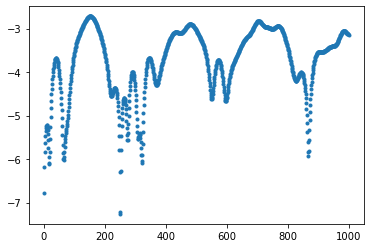

In [263]:

plt.plot(times, distances, ".")




In [239]:
X1_DF

,X1,X2,X3,X4,X5,X6,X7,X8,X9
0.0,"[[-0.004601653199642897, -0.01053541898727417]...","[[0.012787977233529091, 0.03373338654637337], ...","[[0.0022535009775310755, -0.002736978698521852...","[[-0.004828932229429483, -0.009861951693892479...","[[-5.841592155775288e-06, -0.00400981819257140...","[[0.007820243947207928, 0.0084557319059968], [...","[[0.009842784143984318, 0.019993159919977188],...","[[-0.0015867934562265873, 0.001370850019156932...","[[0.005599350202828646, 0.01134730875492096], ..."
0.5,"[[-0.004601672757416964, -0.010535462759435177...","[[0.012787916697561741, 0.03373357653617859], ...","[[0.002253712387755513, -0.0027370783500373363...","[[-0.0048289829865098, -0.009861978702247143],...","[[-5.739329481002642e-06, -0.00400987919420003...","[[0.00782051868736744, 0.008455661125481129], ...","[[0.00984288938343525, 0.019993213936686516], ...","[[-0.001586928148753941, 0.001370911719277501]...","[[0.005599411204457283, 0.011347339488565922],..."
1.0,"[[-0.0046206810511648655, -0.01057900115847587...","[[0.01272864080965519, 0.033921945840120316], ...","[[0.002461691852658987, -0.002835164312273264]...","[[-0.004878966603428125, -0.009889615699648857...","[[9.478649008087814e-05, -0.004070368595421314...","[[0.008090547285974026, 0.008386772125959396],...","[[0.009947498328983784, 0.020047906786203384],...","[[-0.0017193774692714214, 0.001431565033271908...","[[0.005659584421664476, 0.011378053575754166],..."
1.5,"[[-0.004639499820768833, -0.010622105561196804...","[[0.0126729104667902, 0.03410714492201805], [0...","[[0.002662364160642028, -0.0029299864545464516...","[[-0.004927660804241896, -0.009917321614921093...","[[0.0001916613255161792, -0.004129097331315279...","[[0.008351622149348259, 0.008321304805576801],...","[[0.01004937943071127, 0.020102787762880325], ...","[[-0.001847189967520535, 0.0014901651302352548...","[[0.00571818184107542, 0.011408887803554535], ..."
2.0,"[[-0.004658102989196777, -0.010664715431630611...","[[0.012620947323739529, 0.03428885340690613], ...","[[0.0028551898431032896, -0.003021298907697200...","[[-0.004974958021193743, -0.009945075027644634...","[[0.00028461855254136026, -0.00418592710047960...","[[0.008603068068623543, 0.008259485475718975],...","[[0.01014830730855465, 0.020157817751169205], ...","[[-0.001970022451132536, 0.0015465582255274057...","[[0.005775073077529669, 0.011439818888902664],..."
...,...,...,...,...,...,...,...,...,...
498.0,"[[0.000802184222266078, 0.0018354778876528144]...","[[-0.008750264532864094, -0.003028784412890672...","[[0.01116411853581667, -0.004571006167680025],...","[[-0.0009054516558535397, 0.002481312025338411...","[[0.005850153975188732, -0.00185619224794209],...","[[0.012465570122003555, -0.007513305172324181]...","[[0.002004224108532071, -0.005108052399009466]...","[[-0.007046855520457029, 0.0029599128756672144...","[[0.00117876089643687, -0.0029181274585425854]..."
498.5,"[[0.0007515918696299195, 0.0017196520930156112...","[[-0.008582435548305511, -0.00266981590539217]...","[[0.011140631511807442, -0.004580015782266855]...","[[-0.0009512460674159229, 0.002369703259319067...","[[0.005825663451105356, -0.0018896069377660751...","[[0.01249379850924015, -0.0073951189406216145]...","[[0.0020969039760529995, -0.004881463013589382...","[[-0.007033717818558216, 0.0029616255778819323...","[[0.0012313233455643058, -0.002789445221424103..."
499.0,"[[0.0007006106316111982, 0.0016029360704123974...","[[-0.008413000032305717, -0.002308227354660630...","[[0.011116400361061096, -0.004588848911225796]...","[[-0.0009973073611035943, 0.002257199492305517...","[[0.005800699349492788, -0.0019231539918109775...","[[0.01252156961709261, -0.00727573037147522], ...","[[0.002190115163102746, -0.004653053358197212]...","[[-0.007020122371613979, 0.002963195787742734]...","[[0.0012841848656535149, -0.002659728052094578..."
499.5,"[[0.000649268098641187, 0.0014853929169476032]...","[[-0.00824209488928318, -0.0019441935000941157...","[[0.011091521941125393, -0.004597536753